In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn import svm
%matplotlib inline

Для начала загрузим данные из датасета winequality-red

In [2]:
red_wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
X = red_wine_data.drop('quality', axis = 1)
y = red_wine_data.quality

In [3]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Посмотрим на распределение классов у исследуемого датасета.

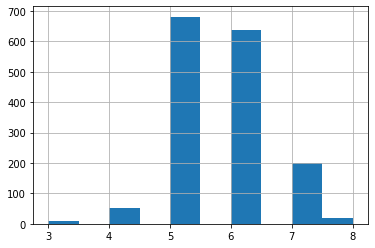

In [4]:
y.hist()

Объекты различных классов распределены неравномерно. Без предварительной подготовки данных классификаторы не будут показывать высокое качество. Чтобы это исправить мы используем алгоритм SMOTET для несбалансированных данных. Он создаст искусственные экземпляры малонаселённых классов и сократит количество экземпляров 5 и 6 классов.

Для начала отмасштабируем значения фич.

In [5]:
Xs = pd.DataFrame(scale(X))
Xs = Xs.rename(columns = {0: 'fixed acidity',
                          1: 'volatile acidity',
                          2: 'citric acid',
                          3: 'residual sugar',
                          4: 'chlorides',
                          5: 'free sulfur dioxide',
                          6: 'total sulfur dioxide',
                          7: 'density',
                          8: 'pH',
                          9: 'sulphates',
                          10: 'alcohol'
                         })
Xs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


Далее разделим данные на тренировочную и тестовую выборку и применим балансный вариант алгоритма SMOTE

In [6]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, random_state = 0)

In [7]:
sm = SMOTETomek(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

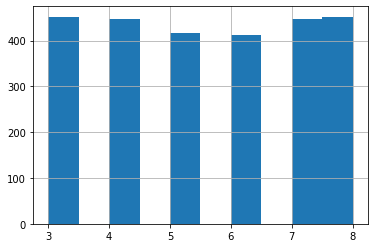

In [8]:
y_train_res = pd.Series(y_train_res)
y_train_res.hist()

In [9]:
X_train_res = pd.DataFrame(X_train_res)
X_train_res = X_train_res.rename(columns = 
                         {
                          0: 'fixed acidity',
                          1: 'volatile acidity',
                          2: 'citric acid',
                          3: 'residual sugar',
                          4: 'chlorides',
                          5: 'free sulfur dioxide',
                          6: 'total sulfur dioxide',
                          7: 'density',
                          8: 'pH',
                          9: 'sulphates',
                          10: 'alcohol'
                         })
X_train_res.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3.838072,-1.775497,0.867948,-0.240375,-0.264960,-0.561823,-0.683222,1.750805,-1.562239,1.073160,-1.147981
1,-0.356000,-1.496173,0.149042,-0.595114,-0.605020,0.394484,-0.257497,-0.978765,-0.136798,-1.110324,0.353895
2,2.631558,-0.993390,1.124700,2.313746,-0.456244,-1.039977,-0.348724,2.466324,-0.719933,0.010924,1.480302
3,-0.011282,1.408795,-0.877968,0.043416,-0.137438,2.785254,1.232543,0.823281,1.094265,-0.756246,-0.397043
4,-0.183641,0.514959,0.405794,0.185312,-0.031169,1.159531,0.168229,0.134264,-0.007213,-0.225128,0.353895


Теперь наши тренировочные данные сбалансированы. Самое время воспользоваться несколькими классификаторами и сравнить их эффективность. Важно отметить, что мы сначала разделили данные на тренировочные и тестовые и только потом применили алгоритм SMOTE только к тренировочным. В качестве метрики будем использовать меры precision, recall, accuracy и матрицу ошибок.

Для начала воспользуемся алгоритмом К-близжайших соседей или KNN. Найдём оптимальный набор параметров через сетку GridSearchCV.

In [10]:
grid_params = {
    'n_neighbors': range(3, 70, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
gs = GridSearchCV(
     KNeighborsClassifier(),
     grid_params,
     verbose = 1,
     cv = 5,
     n_jobs  = -1)

In [11]:
gs_result = gs.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 975 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1020 out of 1020 | elapsed:   14.3s finished


In [12]:
gs_result.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [13]:
be = gs_result.best_estimator_

In [14]:
y_pred = be.predict(X_test)
y_pred = pd.Series(y_pred)

In [15]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.09      0.29      0.14        17
           5       0.70      0.56      0.62       229
           6       0.58      0.43      0.49       225
           7       0.34      0.65      0.45        48
           8       0.00      0.00      0.00         5

    accuracy                           0.49       528
   macro avg       0.29      0.32      0.28       528
weighted avg       0.59      0.49      0.53       528



array([[  0,   3,   0,   1,   0,   0],
       [  2,   5,   3,   7,   0,   0],
       [  5,  22, 129,  52,  16,   5],
       [  3,  23,  51,  96,  41,  11],
       [  1,   0,   1,   7,  31,   8],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

Далее попробуем алгоритм адаптивного бустинга

In [16]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train_res, y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [17]:
y_pred = pd.Series(abc.predict(X_test))

In [18]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           3       0.01      1.00      0.02         4
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00       229
           6       0.00      0.00      0.00       225
           7       0.16      0.52      0.25        48
           8       0.04      0.40      0.08         5

    accuracy                           0.06       528
   macro avg       0.04      0.32      0.06       528
weighted avg       0.02      0.06      0.02       528



C:\Users\AlexandeR\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  4,   0,   0,   0,   0,   0],
       [ 12,   0,   0,   0,   4,   1],
       [191,   0,   0,   0,  35,   3],
       [114,   0,   0,   0,  87,  24],
       [  8,   0,   0,   0,  25,  15],
       [  0,   0,   0,   0,   3,   2]], dtype=int64)

Для небинарной классификации AdaBoosting абсолютно не подходит.

Далее воспользуемся алгоритмом случайного леса.

In [19]:
rfc = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators': range(10, 51, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 10),
             'min_samples_split': range(2, 10, 2)
            }

In [20]:
grid_search_cv_clf = GridSearchCV(rfc, parametrs, cv=3, n_jobs=-1)

In [21]:
grid_search_cv_clf.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [22]:
grid_search_cv_clf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [23]:
best_est = grid_search_cv_clf.best_estimator_

In [24]:
y_pred = pd.Series(best_est.predict(X_test))

In [25]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.15      0.24      0.19        17
           5       0.74      0.72      0.73       229
           6       0.70      0.55      0.61       225
           7       0.41      0.67      0.50        48
           8       0.00      0.00      0.00         5

    accuracy                           0.62       528
   macro avg       0.33      0.36      0.34       528
weighted avg       0.66      0.62      0.63       528



array([[  0,   2,   0,   2,   0,   0],
       [  0,   4,   9,   3,   1,   0],
       [  2,  13, 166,  38,   8,   2],
       [  2,   7,  48, 123,  35,  10],
       [  1,   0,   2,   8,  32,   5],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

На данный момент алгоритм случайного леса дал наилучший результат по всем метрикам. Посмотрим на важность фич в данном случае.

In [26]:
pd.DataFrame(best_est.feature_importances_).rename(
                        index=
                        {
                         0: 'fixed acidity',
                         1: 'volatile acidity',
                         2: 'citric acid',
                         3: 'residual sugar',
                         4: 'chlorides',
                         5: 'free sulfur dioxide',
                         6: 'total sulfur dioxide',
                         7: 'density',
                         8: 'pH',
                         9: 'sulphates',
                         10: 'alcohol'
                         },
                        columns = {0: 'importance'})

,importance
fixed acidity,0.055199
volatile acidity,0.144032
citric acid,0.084731
residual sugar,0.057729
chlorides,0.111857
free sulfur dioxide,0.060969
total sulfur dioxide,0.086612
density,0.060103
pH,0.082055
sulphates,0.117619


Рассмотрим метод опорных векторов

In [27]:
svc = svm.SVC()
svc.fit(X_train_res, y_train_res)

C:\Users\AlexandeR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
y_pred = pd.Series(svc.predict(X_test))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.41      0.19        17
           5       0.70      0.57      0.63       229
           6       0.60      0.44      0.51       225
           7       0.28      0.52      0.37        48
           8       0.00      0.00      0.00         5

    accuracy                           0.49       528
   macro avg       0.28      0.32      0.28       528
weighted avg       0.59      0.49      0.53       528



array([[  0,   3,   0,   1,   0,   0],
       [  2,   7,   3,   4,   1,   0],
       [  6,  32, 130,  50,   8,   3],
       [  0,  13,  51,  99,  51,  11],
       [  1,   3,   1,   9,  25,   9],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

Из всего этого напрашивается вывод, что даже при использовании ресемплинга данных, классификаторы показывают низкое качество на первоначально малочисленных классах. При этом мы не можем воспользоваться алгоритмами бинарной классификации. Попробуем другой подход - перейдём к 2-м классам. Классы 3, 4, 5 будут нулевым классом, в то время как 6, 7, 8, 9 - первым. Будем работать без оверсемплинга, чтобы не искажать данные.

In [29]:
new_classes = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
red_wine_data['quality_new'] = red_wine_data['quality'].map(new_classes)
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_new
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


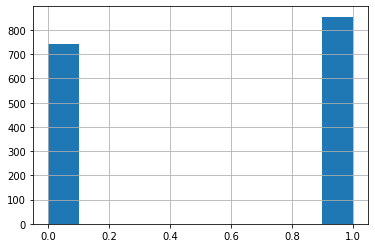

In [30]:
X = red_wine_data.drop(columns = ['quality', 'quality_new'])
y = red_wine_data.quality_new
y.hist()

Теперь наши классы сбалансированы. Посмотрим как изменятся метрики наших классификаторов.

In [31]:
Xs = pd.DataFrame(scale(X))
Xs = Xs.rename(columns = {0: 'fixed acidity',
                          1: 'volatile acidity',
                          2: 'citric acid',
                          3: 'residual sugar',
                          4: 'chlorides',
                          5: 'free sulfur dioxide',
                          6: 'total sulfur dioxide',
                          7: 'density',
                          8: 'pH',
                          9: 'sulphates',
                          10: 'alcohol'
                         })
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, random_state = 0)

KNN:

In [32]:
grid_params = {
    'n_neighbors': range(3, 70, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
gs = GridSearchCV(
     KNeighborsClassifier(),
     grid_params,
     verbose = 1,
     cv = 5,
     n_jobs  = -1)

In [33]:
gs_result = gs.fit(X_train, y_train)
gs_result.best_params_
be = gs_result.best_estimator_

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1020 out of 1020 | elapsed:    4.1s finished


In [34]:
y_pred = be.predict(X_test)
y_pred = pd.Series(y_pred)

In [35]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       250
           1       0.75      0.80      0.77       278

    accuracy                           0.76       528
   macro avg       0.76      0.75      0.75       528
weighted avg       0.76      0.76      0.76       528



array([[177,  73],
       [ 56, 222]], dtype=int64)

В KNN значение accuracy поднялось с 0.49 до 0.76

AdaBoost:

In [36]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
y_pred = pd.Series(abc.predict(X_test))

In [37]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       250
           1       0.72      0.74      0.73       278

    accuracy                           0.71       528
   macro avg       0.71      0.71      0.71       528
weighted avg       0.71      0.71      0.71       528



array([[169,  81],
       [ 73, 205]], dtype=int64)

Адаптивный бустинг на бинарной классификации дал результат accuracy = 0.71 против 0.06.

RandomForest:

In [38]:
rfc = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators': range(10, 51, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 10),
             'min_samples_split': range(2, 10, 2)
            }
grid_search_cv_clf = GridSearchCV(rfc, parametrs, cv=3, n_jobs=-1)

In [39]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [40]:
grid_search_cv_clf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [41]:
best_est = grid_search_cv_clf.best_estimator_
y_pred = pd.Series(best_est.predict(X_test))

In [42]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       250
           1       0.78      0.80      0.79       278

    accuracy                           0.78       528
   macro avg       0.78      0.78      0.78       528
weighted avg       0.78      0.78      0.78       528



array([[188,  62],
       [ 56, 222]], dtype=int64)

RandomForest показал рост accuracy с 0.62 до 0.78. Посмотрим на важность фич.

In [43]:
pd.DataFrame(best_est.feature_importances_).rename(
                        index=
                        {
                         0: 'fixed acidity',
                         1: 'volatile acidity',
                         2: 'citric acid',
                         3: 'residual sugar',
                         4: 'chlorides',
                         5: 'free sulfur dioxide',
                         6: 'total sulfur dioxide',
                         7: 'density',
                         8: 'pH',
                         9: 'sulphates',
                         10: 'alcohol'
                         },
                        columns = {0: 'importance'})

,importance
fixed acidity,0.067483
volatile acidity,0.109284
citric acid,0.060683
residual sugar,0.047931
chlorides,0.066539
free sulfur dioxide,0.059970
total sulfur dioxide,0.108535
density,0.085885
pH,0.073207
sulphates,0.144398


Из этого можно сделать вывод, что при разбиении красного вина на 2 класса, больше всего влияет уровень алкоголя и сульфатов.

SVM:

In [44]:
svc = svm.SVC()
svc.fit(X_train, y_train)

C:\Users\AlexandeR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
y_pred = pd.Series(svc.predict(X_test))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       250
           1       0.76      0.76      0.76       278

    accuracy                           0.75       528
   macro avg       0.75      0.75      0.75       528
weighted avg       0.75      0.75      0.75       528



array([[182,  68],
       [ 66, 212]], dtype=int64)

SVC дал рост accuracy с 0.49 до 0.75

На основании проведённых эсперементов можно сделать заключение о том, что в условиях данной задачи при наличии 6-7 классов и дисбаланса данных, наилучшее качество классификации даёт алгоритм случайного леса RandomForest. Он же является наиболее ресурсоёмким алгоритмом из всех испробованных. Отметим, что несмотря на ресемплинг, ни один алгоритм не дал нам хоть какой-то значимой оценки данных малонаселённых классов. Рекомендуем переходить к двум классам. Это даст более высокое качество классификации в смысле точности и выскоих показателей F1-меры. С прикладной точки зрения мы получаем предсказание качества вина в терминах 'ниже среднего' и 'выше среднего', что может являться полезной рекомендацией в вопросах выбора.